In [5]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

In [6]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [7]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV
  try:
    df_okejek = pd.read_csv(io.BytesIO(uploaded[fn]))
    print("Successfully loaded CSV into df_okejek")
  except pd.errors.ParserError:
      print(f"Error: Could not parse {fn} as a CSV. Please upload a valid CSV file.")
      df_okejek = pd.DataFrame() # Create an empty DataFrame if parsing fails
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_okejek = pd.DataFrame()


Saving okejek_comments.csv to okejek_comments (2).csv
User uploaded file "okejek_comments (2).csv" with length 1323405 bytes
Successfully loaded CSV into df_okejek


In [8]:
df_okejek

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount,sentiment_rating
0,f5062dfb-1407-449a-8527-d7017c8eff8f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi blm stabil, layanan mobil sering muncul",5,0,6.6.32,2025-09-03 03:19:25,NaN,NaN,6.6.32,0.000000,0.000000,8,0,1,Positive
1,6074ac89-5ee1-429d-b274-7aa6105a8116,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gak pernah pake lagi. sewa 1 mobil utk bandung...,1,0,6.6.30,2025-09-01 18:06:47,NaN,NaN,6.6.30,0.325521,0.333333,62,0,22,Negative
2,35ff2aad-e7c2-463e-8642-8657ce6b2519,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pelayanan drivernya gak ramah, order malah bat...",1,0,NaN,2025-08-10 11:53:19,NaN,NaN,NaN,0.000000,0.000000,10,0,3,Negative
3,b2422d26-87d5-4aa1-8ecc-61a87b080d3b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"food nya mohon dibanyakin untuk daerah depok,s...",5,0,6.6.21,2025-08-09 08:51:05,NaN,NaN,6.6.21,0.000000,0.000000,21,0,4,Positive
4,a32127d3-63cd-48ac-9ce2-a63c492bf03e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sukses trus okejek aplikasi nya bagus sekali,5,1,6.6.1,2025-07-27 05:12:36,NaN,NaN,6.6.1,0.000000,0.000000,7,0,0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,0a498df8-94a5-4778-8917-276f3f93e1c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ongkir memang mahal yaa.....,2,3,1.0.1,2016-06-22 06:09:19,Hi ira...lebih murah dari gojek kok...,2016-06-22 08:28:41,1.0.1,0.000000,0.000000,4,0,5,Negative
4538,86e3813b-f5b4-4c32-8149-4266732faa22,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantaf,5,3,NaN,2016-06-14 12:55:00,Hi mas black...terima kasih sudah dukung karya...,2016-06-22 02:29:53,NaN,0.000000,0.000000,1,0,0,Positive
4539,3507b3be-0959-41a8-9dac-269a7d52b8e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,3 bintang dulu kalau bagus kasih 5 bintang sem...,3,1,1.0.0-beta5,2016-06-11 03:50:09,NaN,NaN,1.0.0-beta5,0.000000,0.000000,13,0,0,Neutral
4540,f0d2243b-3471-4d62-97d5-5c79734ce3ee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk daerah malang,5,4,1.0.0-beta5,2016-06-08 18:50:48,"Halo septi, utk sementara hanya di malang..",2016-06-10 00:46:08,1.0.0-beta5,0.000000,0.000000,4,0,0,Positive


In [9]:
df_okejek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              4542 non-null   object 
 1   userName              4542 non-null   object 
 2   userImage             4542 non-null   object 
 3   content               4448 non-null   object 
 4   score                 4542 non-null   int64  
 5   thumbsUpCount         4542 non-null   int64  
 6   reviewCreatedVersion  3211 non-null   object 
 7   at                    4542 non-null   object 
 8   replyContent          338 non-null    object 
 9   repliedAt             338 non-null    object 
 10  appVersion            3211 non-null   object 
 11  sentiment_polarity    4542 non-null   float64
 12  sentiment_subjective  4542 non-null   float64
 13  wordCount             4542 non-null   int64  
 14  uppercaseCharCount    4542 non-null   int64  
 15  specialCharCount     

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download Indonesian stopwords if not available
nltk.download('stopwords')
indonesian_stopwords = set(stopwords.words('indonesian'))

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_okejek[text_column].dropna().astype(str))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_okejek.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,"aplikasi blm stabil, layanan mobil sering muncul",5,0,6.6.32,2025-09-03 03:19:25,NaN,NaN
1,gak pernah pake lagi. sewa 1 mobil utk bandung...,1,0,6.6.30,2025-09-01 18:06:47,NaN,NaN
2,"pelayanan drivernya gak ramah, order malah bat...",1,0,NaN,2025-08-10 11:53:19,NaN,NaN
3,"food nya mohon dibanyakin untuk daerah depok,s...",5,0,6.6.21,2025-08-09 08:51:05,NaN,NaN
4,sukses trus okejek aplikasi nya bagus sekali,5,1,6.6.1,2025-07-27 05:12:36,NaN,NaN
...,...,...,...,...,...,...,...
4537,ongkir memang mahal yaa.....,2,3,1.0.1,2016-06-22 06:09:19,Hi ira...lebih murah dari gojek kok...,2016-06-22 08:28:41
4538,mantaf,5,3,NaN,2016-06-14 12:55:00,Hi mas black...terima kasih sudah dukung karya...,2016-06-22 02:29:53
4539,3 bintang dulu kalau bagus kasih 5 bintang sem...,3,1,1.0.0-beta5,2016-06-11 03:50:09,NaN,NaN
4540,untuk daerah malang,5,4,1.0.0-beta5,2016-06-08 18:50:48,"Halo septi, utk sementara hanya di malang..",2016-06-10 00:46:08


##Stopwords Removal
Indonesian Stopwords

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
print(len(indonesian_stopwords))

758


,Word,Frequency
0,aplikasi,709
1,oke,641
2,driver,636
3,nya,536
4,yg,395
...,...,...
95,saldo,41
96,wilayah,40
97,tingkatkan,40
98,jaya,40


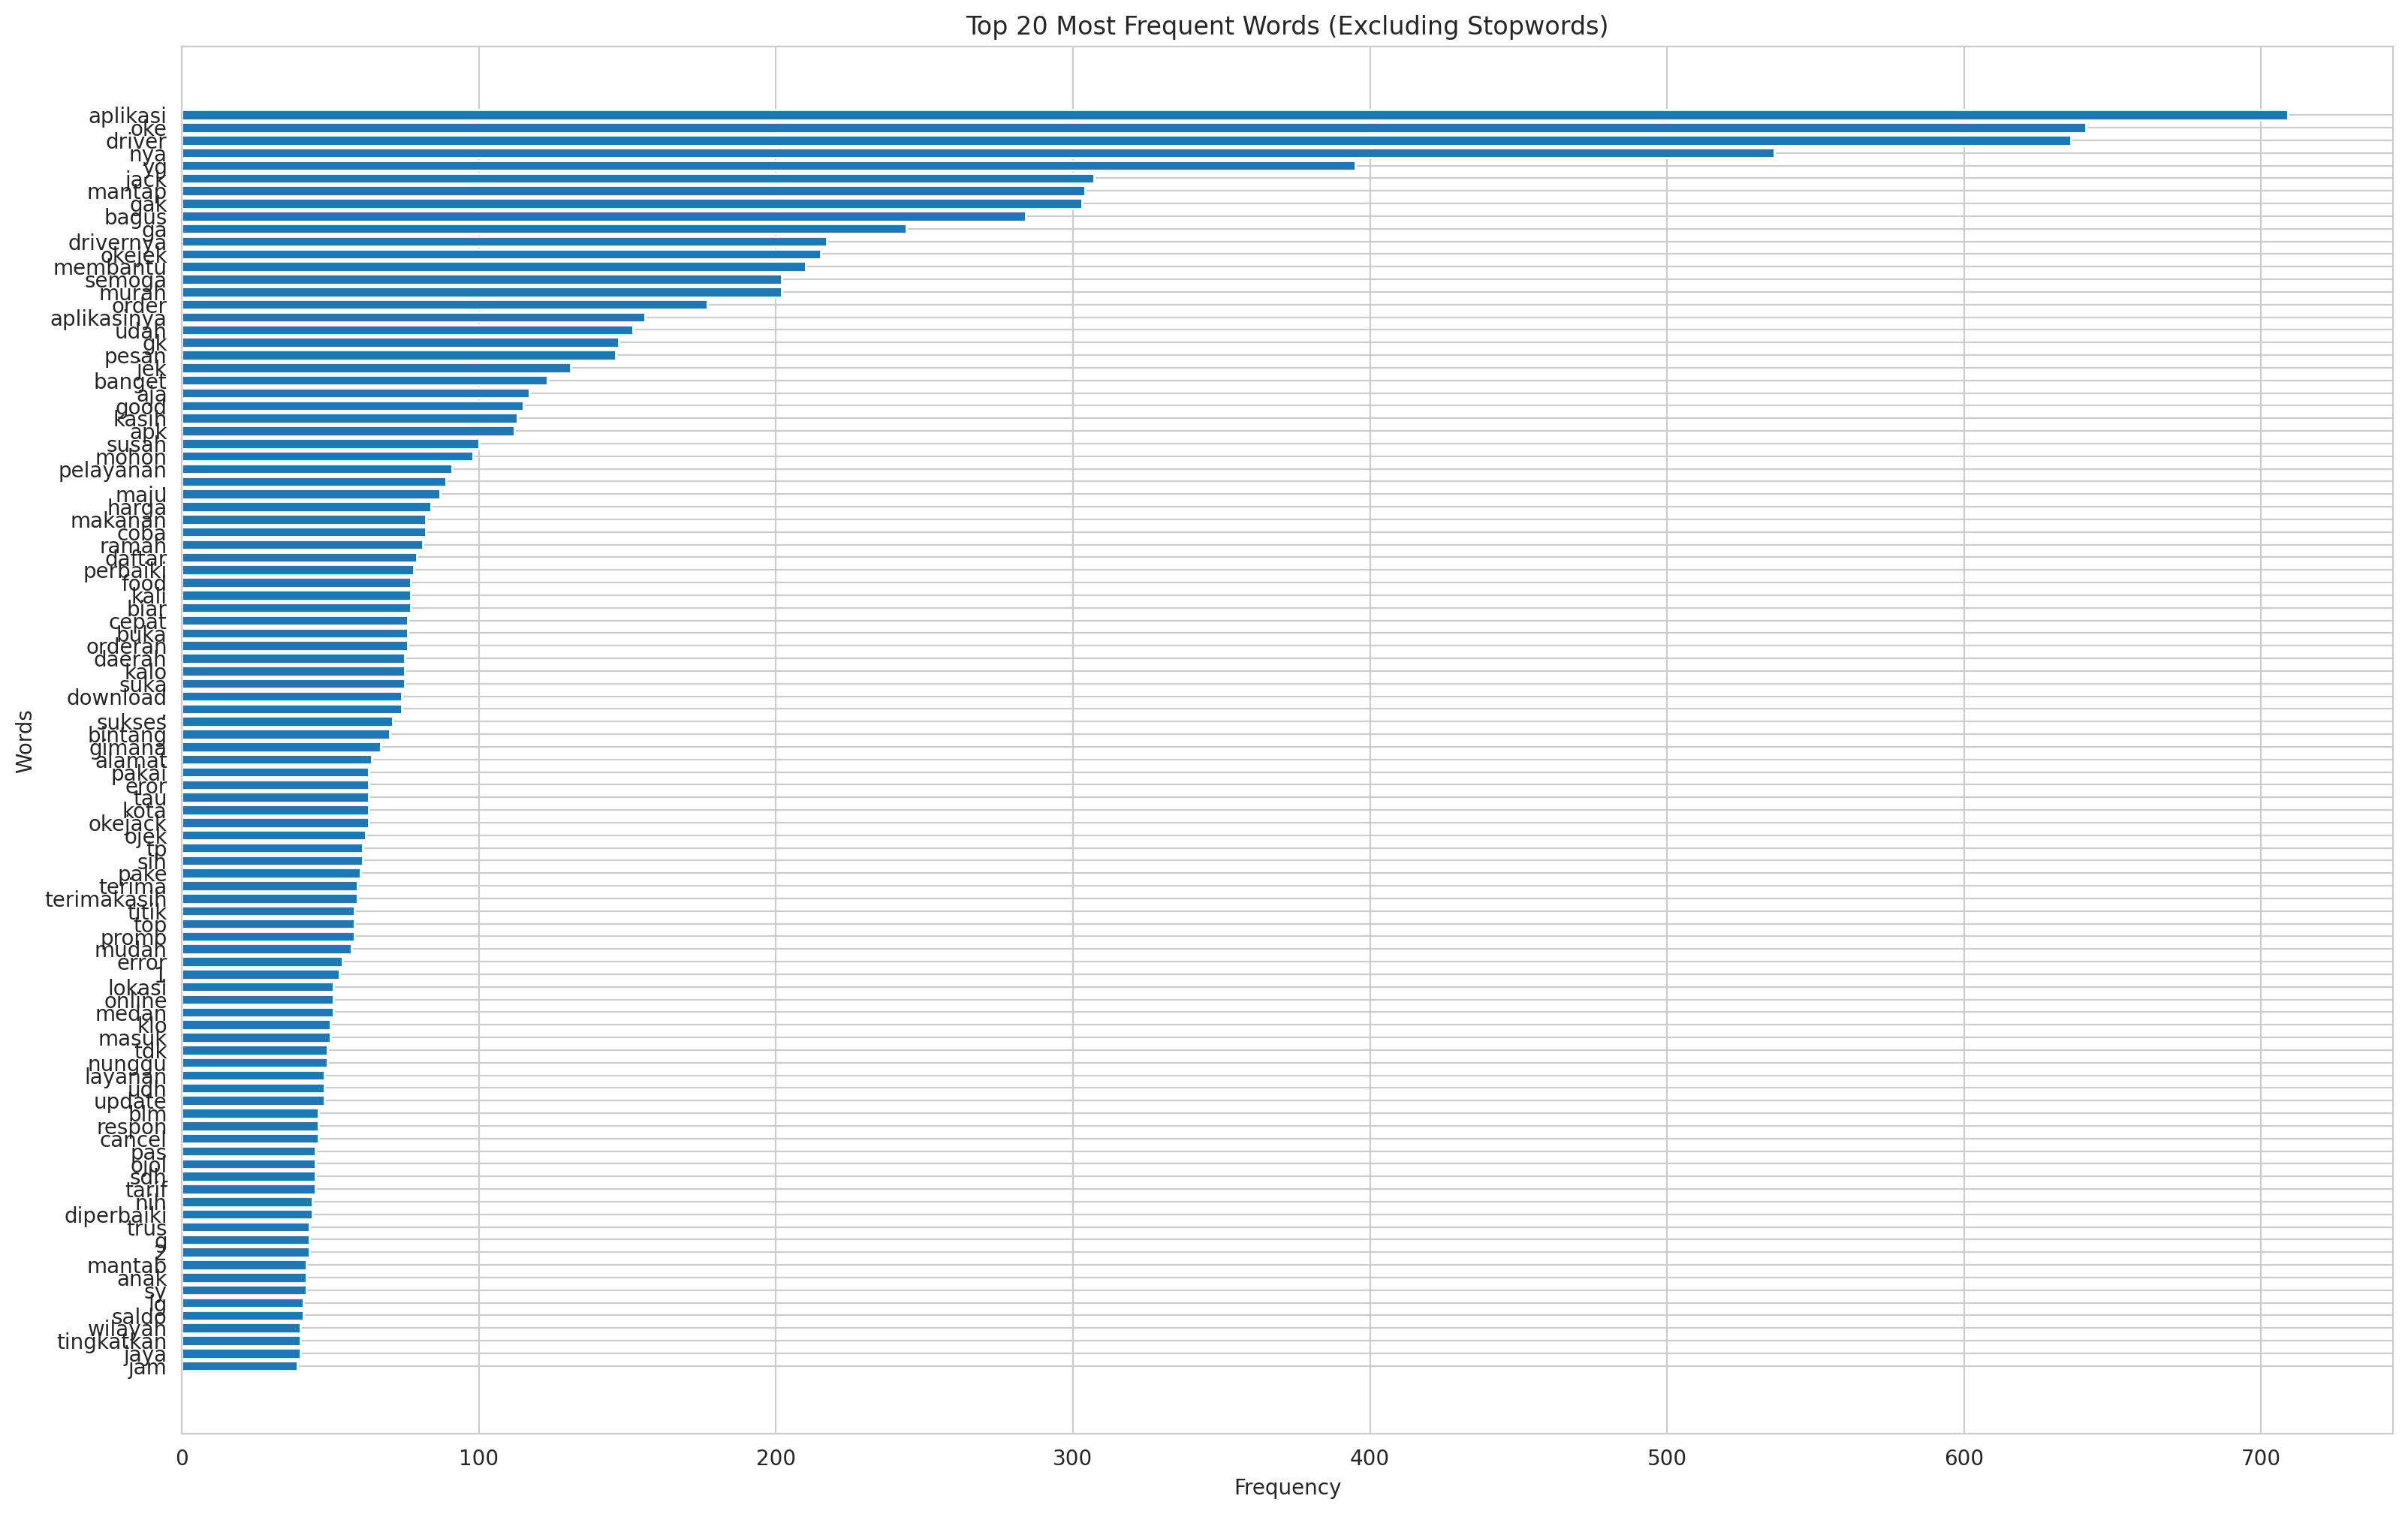

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_okejek[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.show()

In [15]:
common_words

[('aplikasi', 709),
 ('oke', 641),
 ('driver', 636),
 ('nya', 536),
 ('yg', 395),
 ('jack', 307),
 ('mantap', 304),
 ('gak', 303),
 ('bagus', 284),
 ('ga', 244),
 ('drivernya', 217),
 ('okejek', 215),
 ('membantu', 210),
 ('semoga', 202),
 ('murah', 202),
 ('order', 177),
 ('aplikasinya', 156),
 ('udah', 152),
 ('gk', 147),
 ('pesan', 146),
 ('jek', 131),
 ('banget', 123),
 ('aja', 117),
 ('good', 115),
 ('kasih', 113),
 ('apk', 112),
 ('susah', 100),
 ('mohon', 98),
 ('pelayanan', 91),
 ('.', 89),
 ('maju', 87),
 ('harga', 84),
 ('makanan', 82),
 ('coba', 82),
 ('ramah', 81),
 ('daftar', 79),
 ('perbaiki', 78),
 ('food', 77),
 ('kali', 77),
 ('biar', 77),
 ('cepat', 76),
 ('buka', 76),
 ('orderan', 76),
 ('daerah', 75),
 ('kalo', 75),
 ('suka', 75),
 ('download', 74),
 (',', 74),
 ('sukses', 71),
 ('bintang', 70),
 ('gimana', 67),
 ('alamat', 64),
 ('pakai', 63),
 ('eror', 63),
 ('tau', 63),
 ('kota', 63),
 ('okejack', 63),
 ('ojek', 62),
 ('tp', 61),
 ('sih', 61),
 ('pake', 60),
 ('t